In [2]:
import os
import pandas as pd
import pickle
import numpy as np

pkl_files = [file for file in os.listdir() if file.endswith('.pkl')]

df = pd.read_csv('shap-reduc.csv', delimiter=";")
#rows_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 62, 63, 64, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
#df = df.iloc[rows_to_keep]
df.reset_index(drop=True, inplace=True)

means_list = []
column_titles = []

for pkl_file in pkl_files:
    column_title = pkl_file.replace('_most_significantshap_results.pkl', '')
    
    with open(pkl_file, 'rb') as f:
        data_lists = pickle.load(f)
    means = np.mean(data_lists, axis=0)
    means_list.append(means)
    column_titles.append(column_title)

means_df = pd.DataFrame(means_list).transpose()

means_df.columns = column_titles

df = pd.concat([df, means_df], axis=1)
copy = df
print(copy)

     Lambda   Feature Dimensionality   Identifier Aggregation Type  \
0      5.00    Weight             1D       MIstat           SRC IP   
1      5.00      Mean             1D       MIstat           SRC IP   
2      5.00  Variance             1D       MIstat           SRC IP   
3      3.00    Weight             1D       MIstat           SRC IP   
4      3.00      Mean             1D       MIstat           SRC IP   
..      ...       ...            ...          ...              ...   
415    0.10  50th QDS             1D  DT_MI_QUANT           DST IP   
416    0.10  75th QDS             1D  DT_MI_QUANT           DST IP   
417    0.01  25th QDS             1D  DT_MI_QUANT           DST IP   
418    0.01  50th QDS             1D  DT_MI_QUANT           DST IP   
419    0.01  75th QDS             1D  DT_MI_QUANT           DST IP   

     Friday_benign - small - sanity_check_maxConvs.pkl  \
0                                             0.012884   
1                                          

In [3]:
df = copy
# Assuming your dataframe is named df
# Step 1: Multiply entries in columns containing 'benign' by -1
benign_columns = [col for col in df.columns if 'benign - small' in col]
df[benign_columns] *= -1

# Step 2: Calculate means
attack_columns = [col for col in df.columns[5:] if 'benign - small' not in col]
benign_columns = [col for col in df.columns[5:] if 'benign - small' in col]

df['Attack Mean'] = df[attack_columns].mean(axis=1)
df['Benign Mean'] = df[benign_columns].mean(axis=1)

# Now, df contains the modified dataframe with two new columns: 'Attack Mean' and 'Benign Mean'
print(df)

     Lambda   Feature Dimensionality   Identifier Aggregation Type  \
0      5.00    Weight             1D       MIstat           SRC IP   
1      5.00      Mean             1D       MIstat           SRC IP   
2      5.00  Variance             1D       MIstat           SRC IP   
3      3.00    Weight             1D       MIstat           SRC IP   
4      3.00      Mean             1D       MIstat           SRC IP   
..      ...       ...            ...          ...              ...   
415    0.10  50th QDS             1D  DT_MI_QUANT           DST IP   
416    0.10  75th QDS             1D  DT_MI_QUANT           DST IP   
417    0.01  25th QDS             1D  DT_MI_QUANT           DST IP   
418    0.01  50th QDS             1D  DT_MI_QUANT           DST IP   
419    0.01  75th QDS             1D  DT_MI_QUANT           DST IP   

     Friday_benign - small - sanity_check_maxConvs.pkl  \
0                                            -0.012884   
1                                          

KeyError: "None of [Index(['Friday_benign - small', 'Friday_benign - small - sanity_check'], dtype='object')] are in the [columns]"

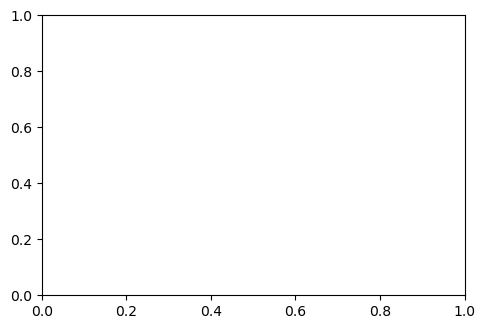

In [4]:
sanity_df = df.filter(like='benign')
import matplotlib.pyplot as plt

# Create a single figure for all boxplots
plt.figure(figsize=(12, 8))

# Iterate over each day and compare the two types of columns
for i, day in enumerate(['Friday', 'Thursday', 'Tuesday', 'Wednesday'], start=1):
    sanity_check_col = f'{day}_benign - small - sanity_check'
    regular_col = f'{day}_benign - small'
    
    # Create boxplots for the two columns
    plt.subplot(2, 2, i)
    sanity_df[[regular_col, sanity_check_col]].boxplot()
    
    plt.title(f'Comparison of Columns for {day}')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks([1, 2], ['Regular', 'Sanity Check'])

plt.tight_layout()
plt.show()

In [3]:
df_means = df[['Lambda', 'Feature', 'Aggregation Type', 'Attack Mean', 'Benign Mean']]
df_means['Total Mean'] = (df_means['Attack Mean'] + df_means['Benign Mean']) / 2

df_sorted = df_means.sort_values(by='Total Mean', ascending=False)
df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.drop(columns=['index'], axis=1)
df_sorted = df_sorted[:20]
print(df_sorted)
df_sorted.to_csv('shap-reduc-sorted.csv', index=True)
df_sorted.to_latex('shap-reduc-unsw.tex', longtable=False, float_format="%.4f")

NameError: name 'df' is not defined

In [4]:
# Print indexes of the 336 most-influential features (80 percent)
if False:
    eighty = list(df_sorted.index[:336])
    with open('indexes/eighty.pkl', 'wb') as f:
        pickle.dump(eighty, f)
    print(f'80 percent: {eighty}')
    sixty = list(df_sorted.index[:252])
    with open('indexes/sixty.pkl', 'wb') as f:
        pickle.dump(sixty, f)
    print(f'60 percent: {sixty}')
    forty = list(df_sorted.index[:168])
    with open('indexes/forty.pkl', 'wb') as f:
        pickle.dump(forty, f)
    print(f'40 percent: {forty}')
    twenty = list(df_sorted.index[:84])
    with open('indexes/twenty.pkl', 'wb') as f:
        pickle.dump(twenty, f)
    print(f'20 percent: {twenty}')


In [8]:
df_feat = df_means[['Feature', 'Total Mean']].groupby('Feature').mean()

grouped_df = df_feat.sort_values(by='Total Mean', ascending=False)
grouped_df.reset_index(inplace=True)
latex_table = grouped_df.to_latex('shap-new-feat.tex', index=True, caption="Feature Relevance of Kitsune's New Features (Feature-basis), Ordered by Descending Relevancy", label="tab:shap-orig-feat")
print(grouped_df)

           Feature    Total Mean
0          TCP RST  2.399517e-04
1           Radius  2.063603e-04
2         Variance  1.451618e-04
3         25th QDS  1.282787e-04
4           Weight  8.085151e-05
5          TCP CWR  7.866014e-05
6          TCP ECE  7.717877e-05
7             Mean  4.403845e-05
8   Variance (JIT)  4.252091e-05
9       Covariance  2.532997e-05
10         TCP ACK  2.105324e-05
11         TCP FIN  1.894624e-05
12    Median (JIT)  1.145939e-05
13      Pearson CC  1.116068e-05
14         TCP SYN  8.855377e-06
15    Weight (JIT)  6.529672e-06
16      Mean (JIT)  6.089163e-06
17        50th QDS  1.674501e-06
18         TCP PSH  3.465181e-07
19         TCP URG  0.000000e+00
20  TCP Flag count -1.187919e-06
21       Magnitude -4.624810e-06
22        75th QDS -5.446437e-06


     Friday_benign - small_maxConvs.pkl  \
0                              0.012713   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
..                                  ...   
415                                 NaN   
416                                 NaN   
417                                 NaN   
418                                 NaN   
419                                 NaN   

     Friday_Botnet - Attempted_maxConvs.pkl  Friday_Botnet_maxConvs.pkl  \
0                                  0.043732                     0.08293   
1                                       NaN                         NaN   
2                                       NaN                         NaN   
3                                       NaN                         NaN   
4                                       NaN                         NaN   
..                               

C:\Users\G000611\AppData\Local\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


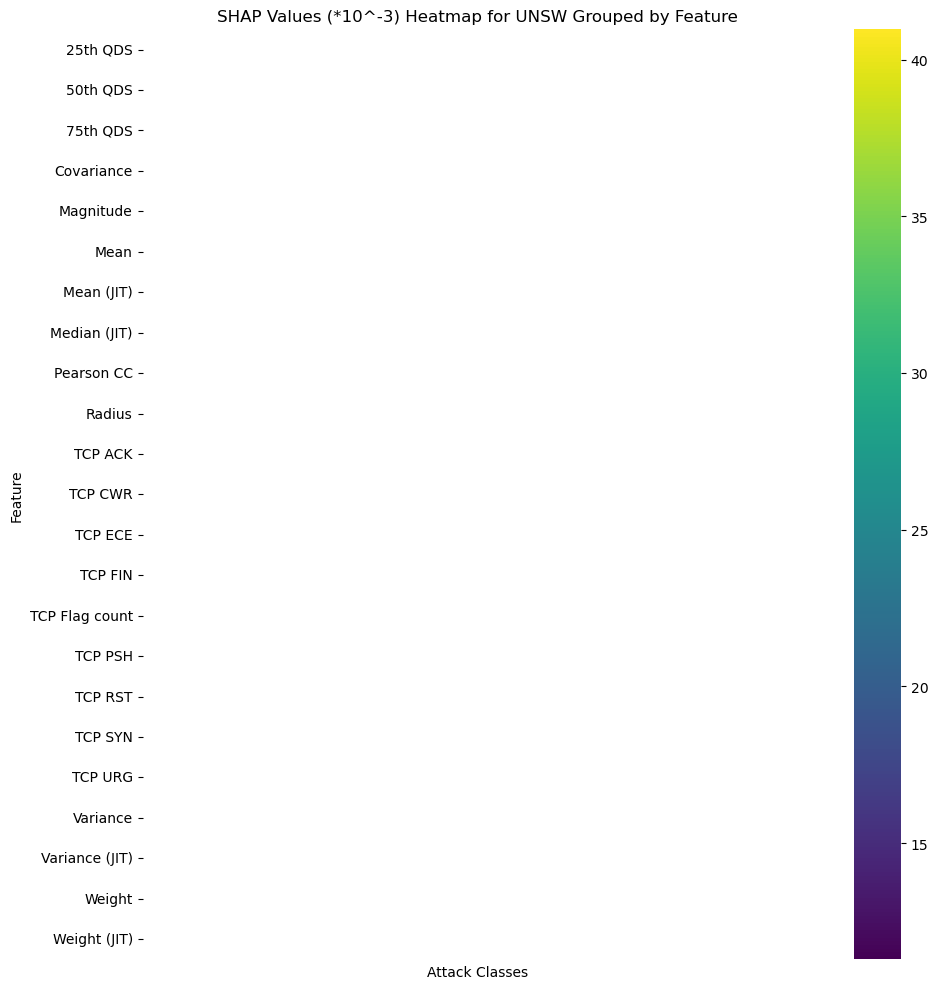

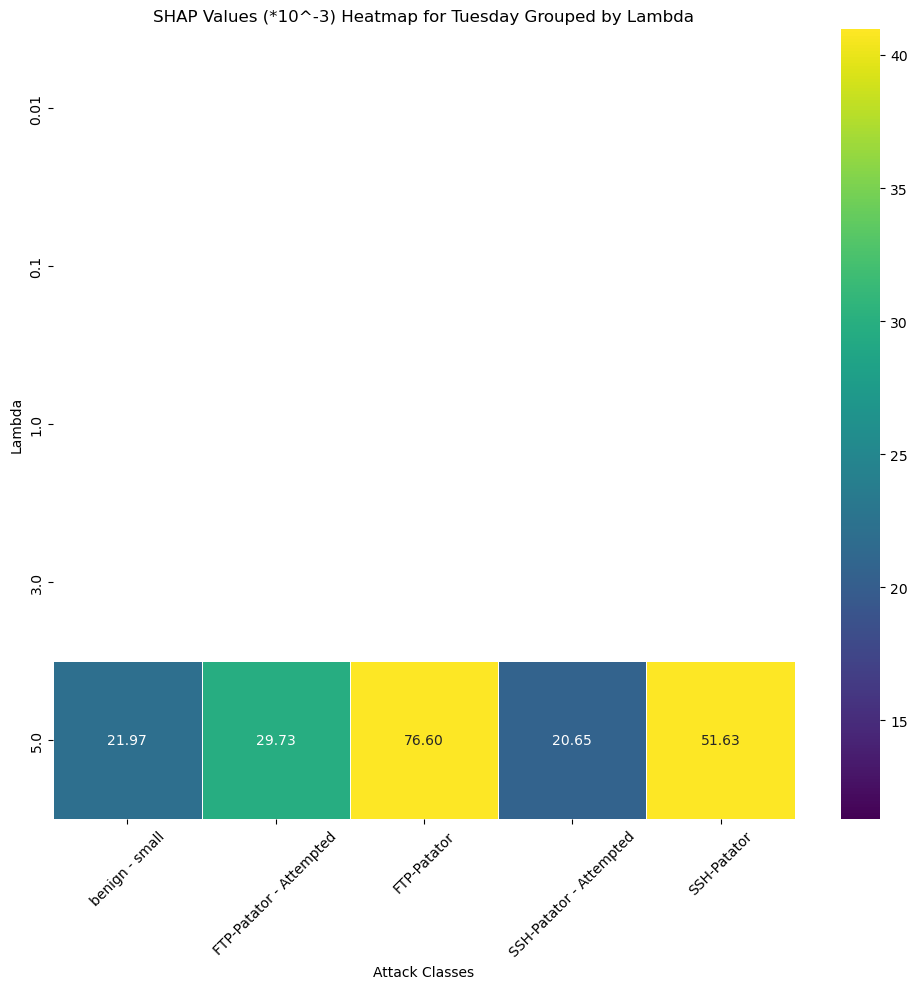

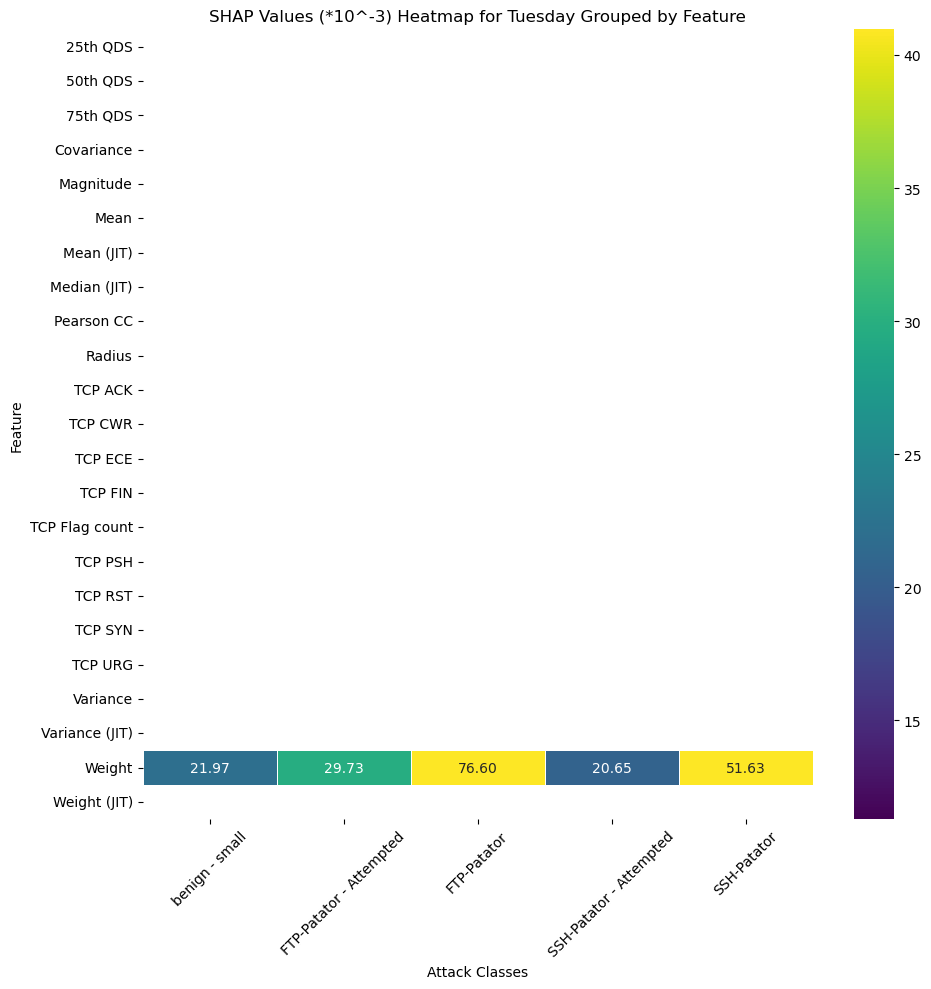

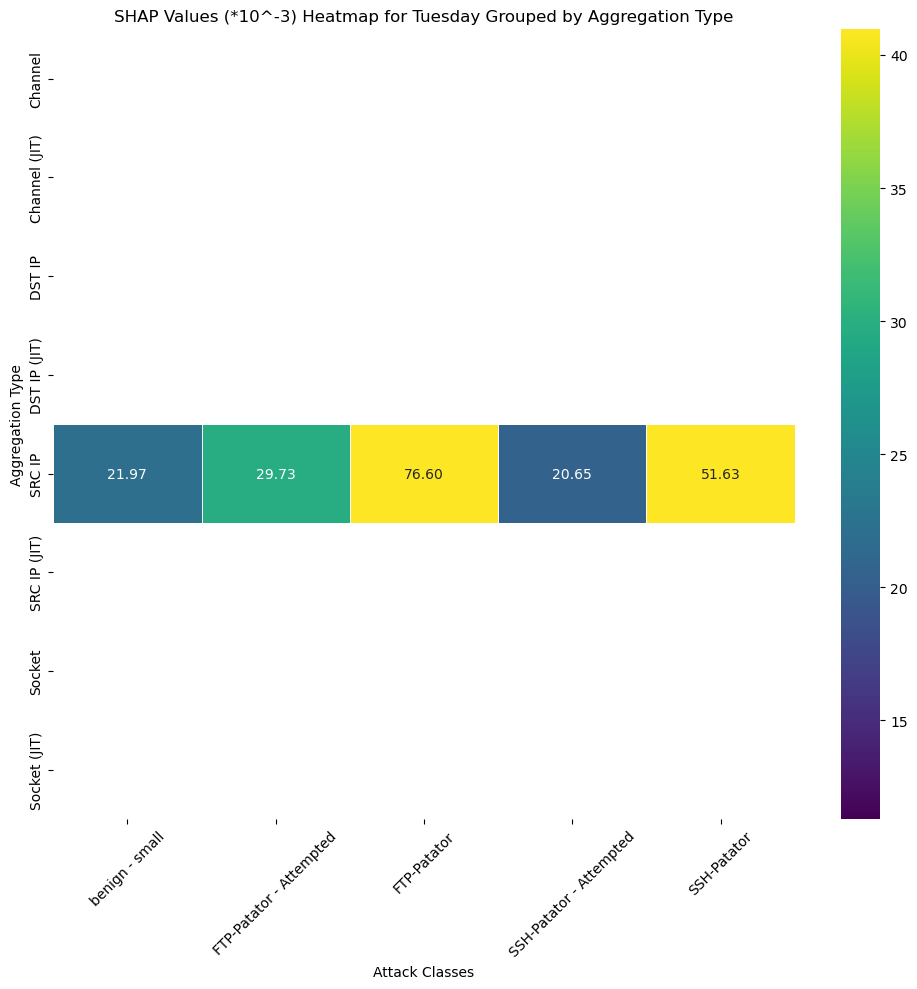

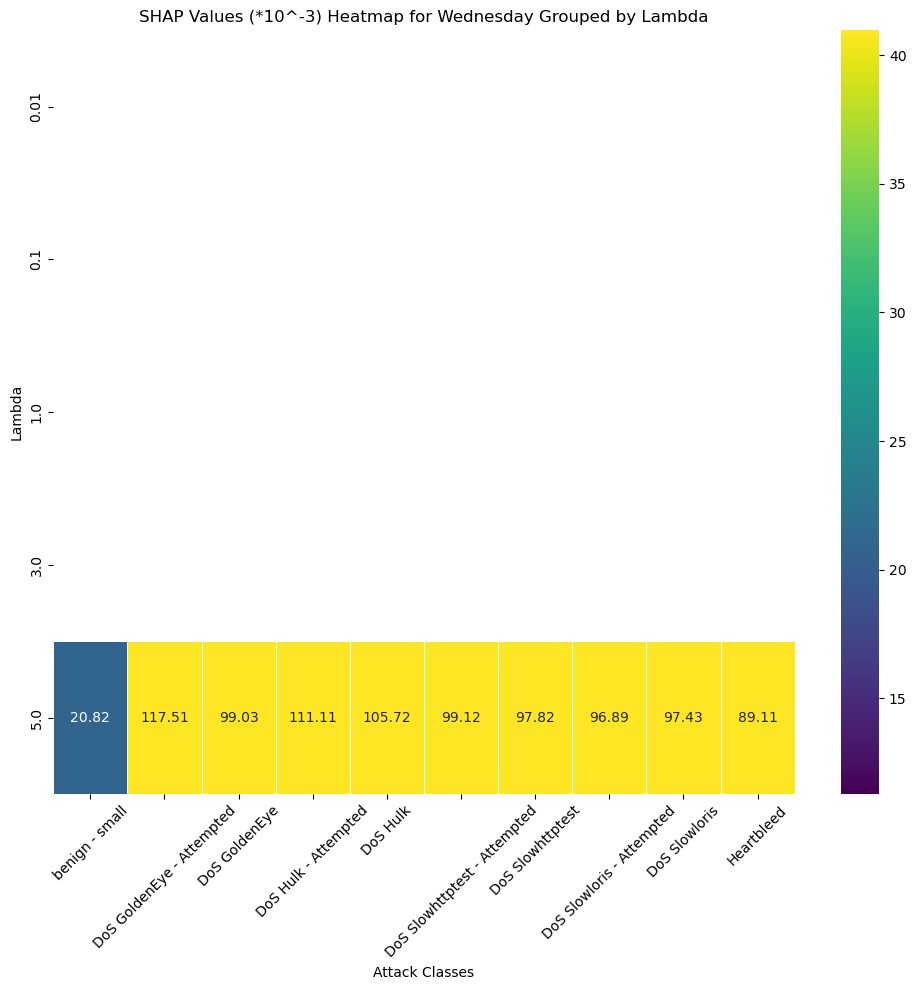

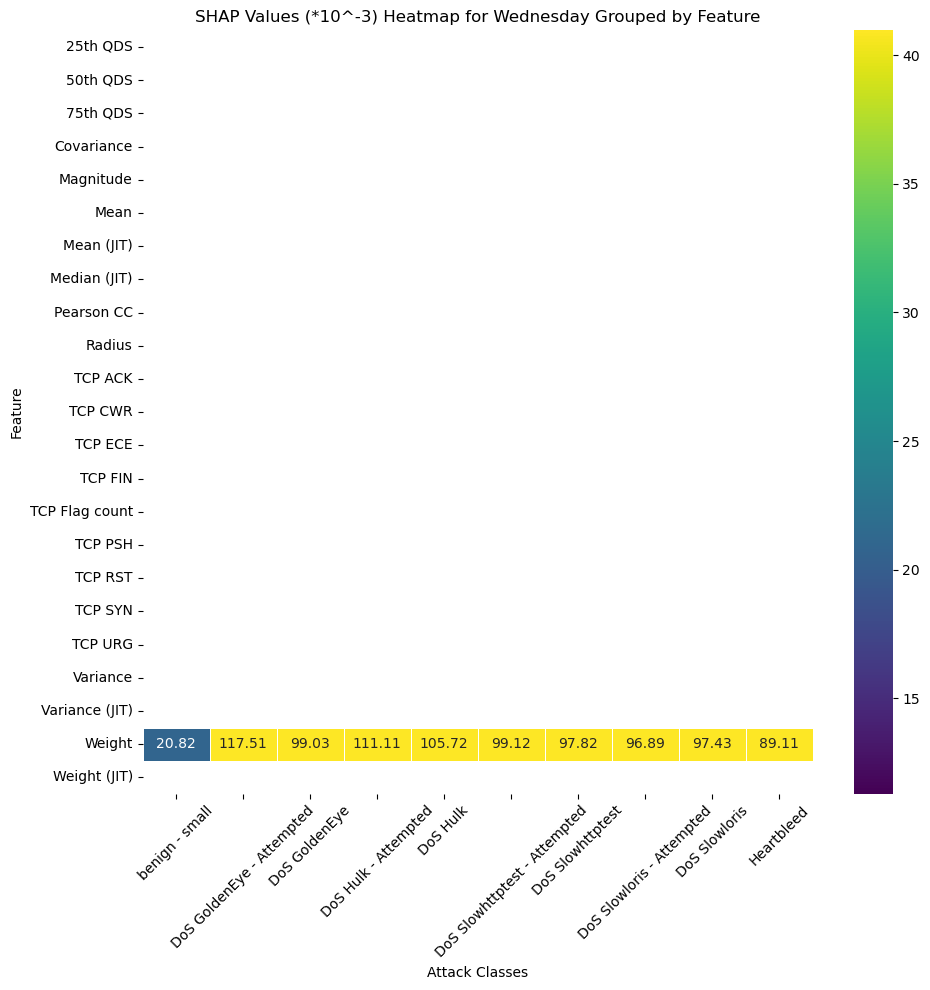

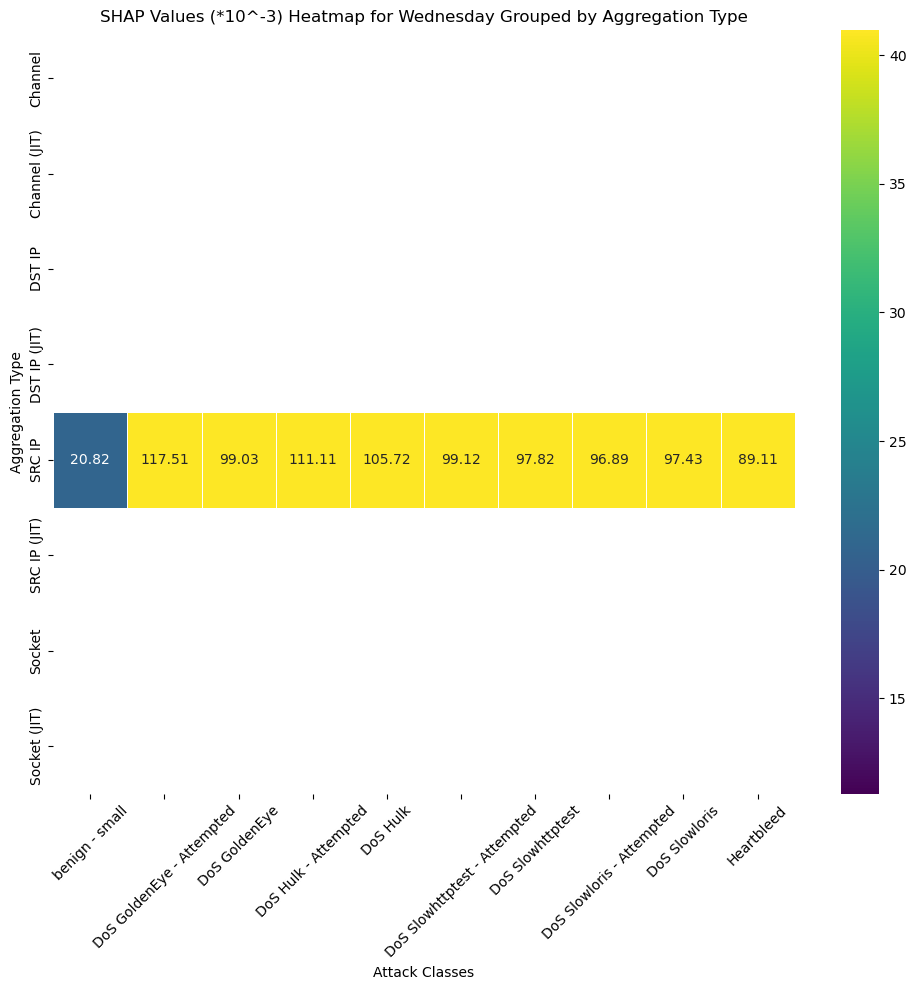

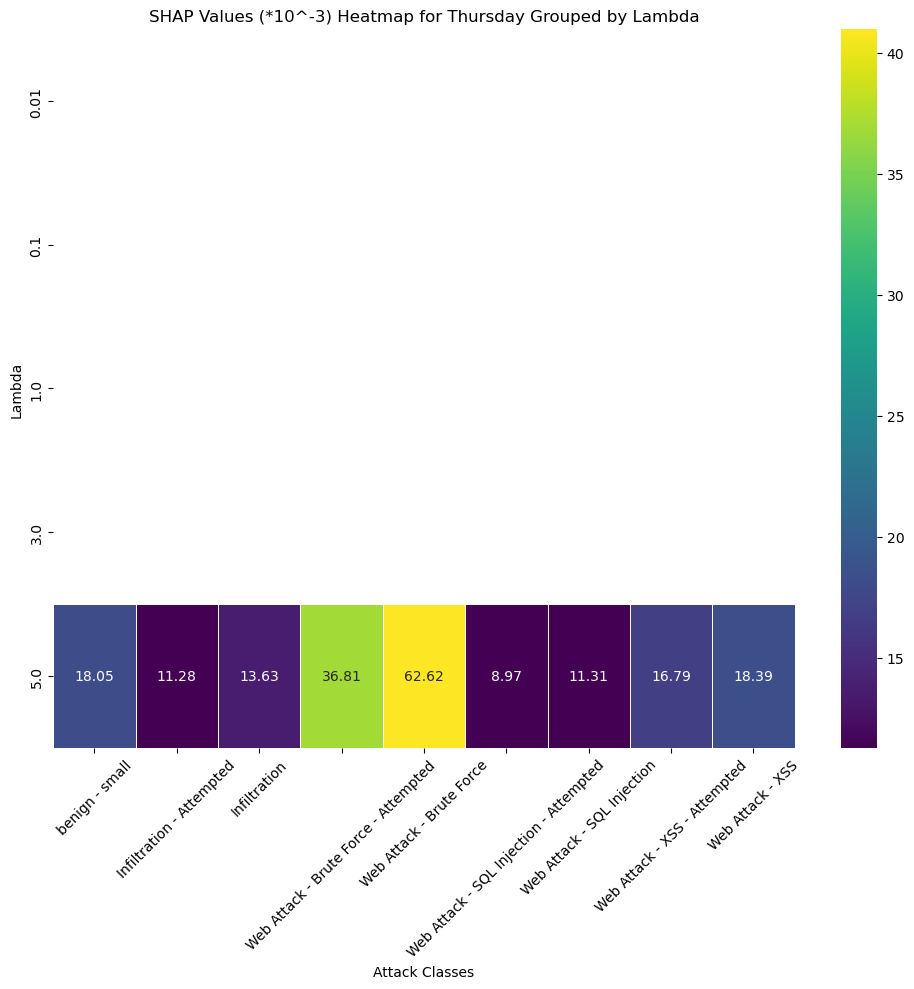

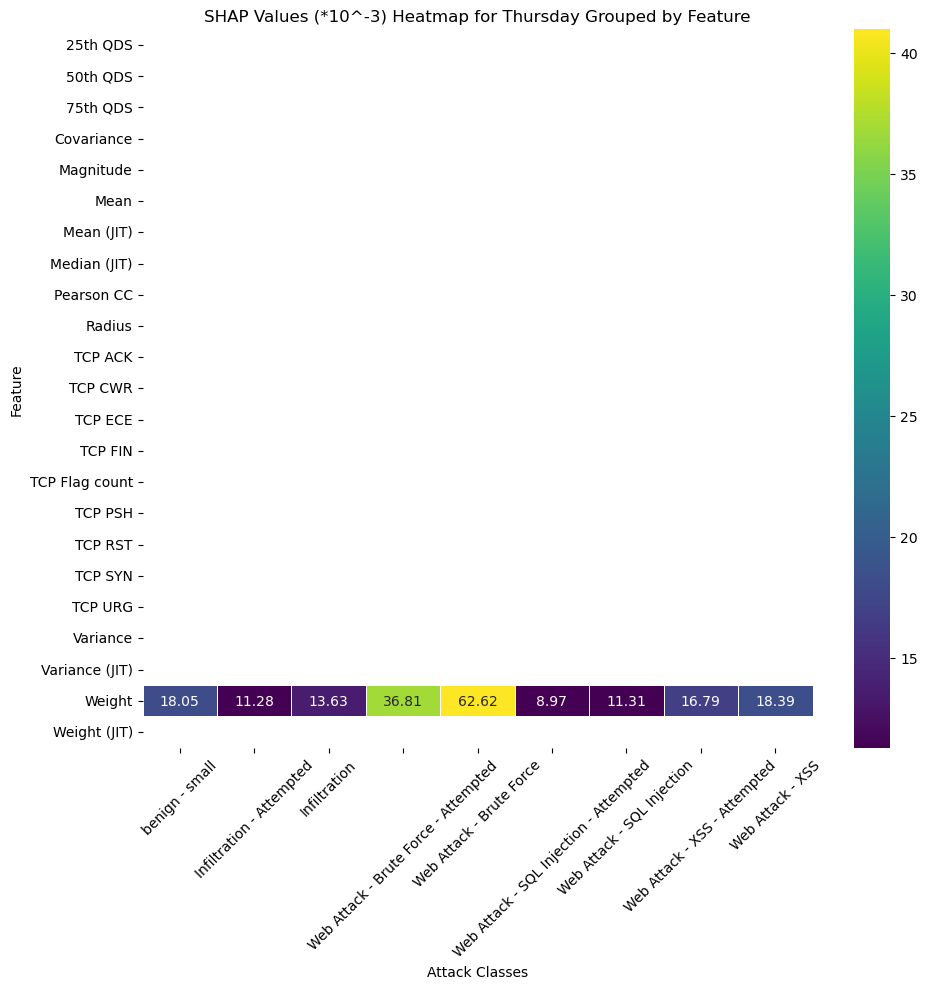

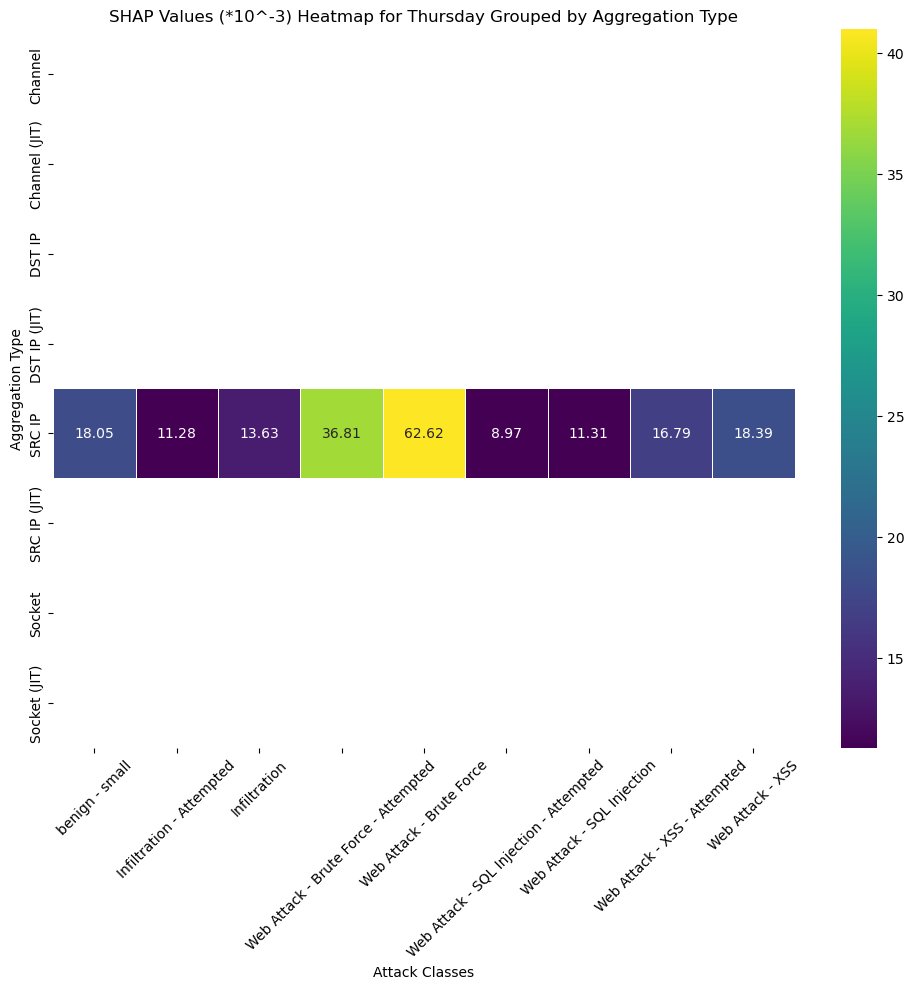

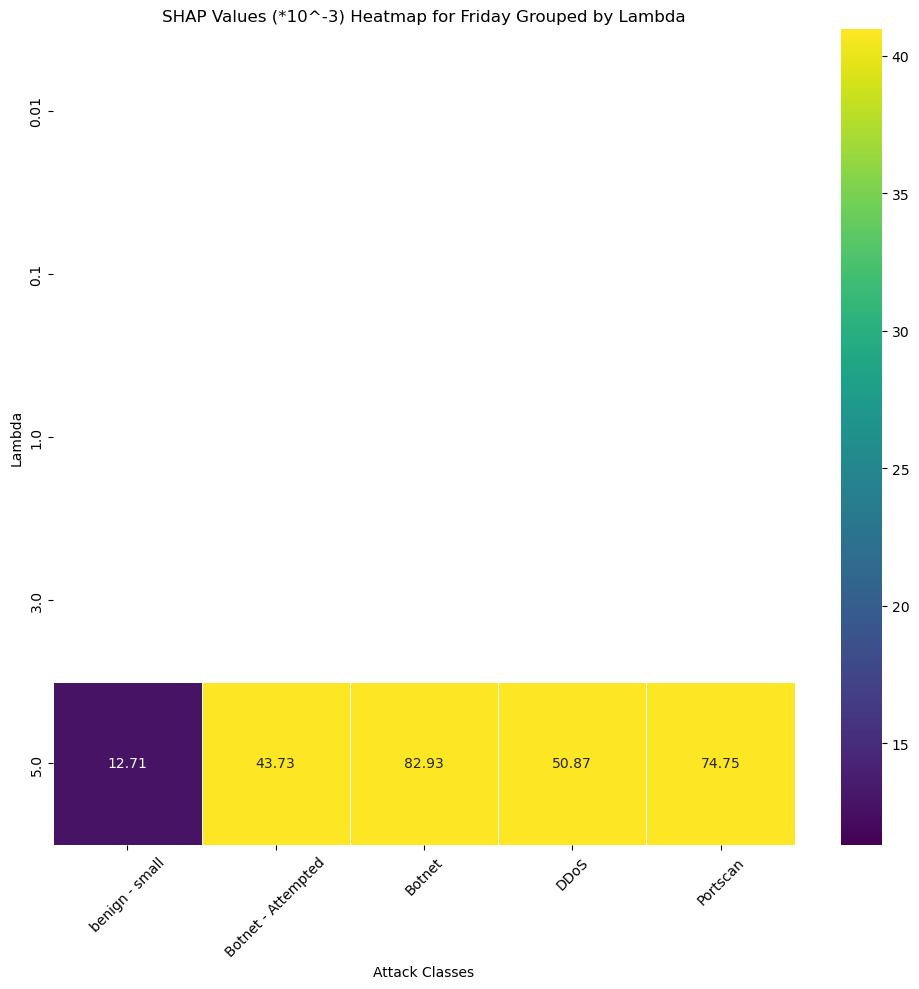

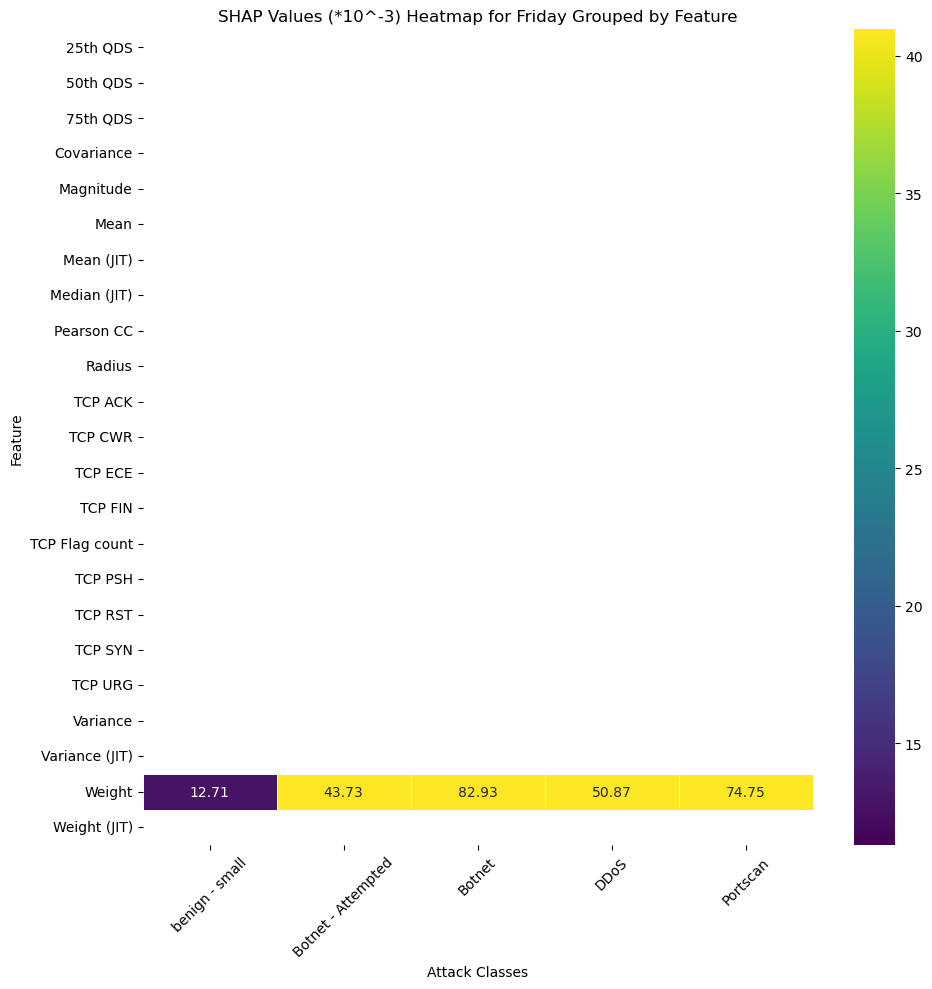

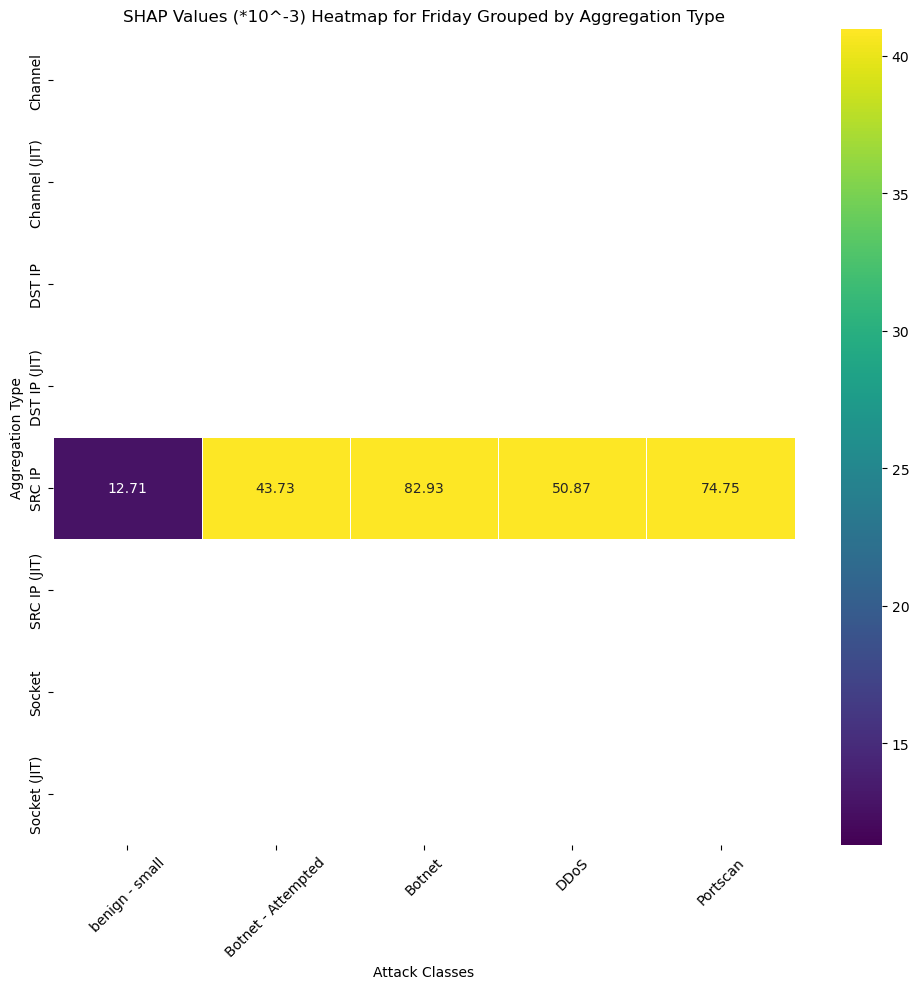

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = copy
def plot_shap_heatmap(df, group_by, day, vmin=None, vmax=None):
    # Filter columns based on the supplied day
    columns_to_keep = [col for col in df.columns if day in col]
    df_filtered = df[['Lambda', 'Feature', 'Aggregation Type'] + columns_to_keep]

    # Group by the specified column, ignoring the other two
    if group_by == 'Lambda':
        df_filtered = df_filtered.drop(columns=['Feature', 'Aggregation Type'], index=1)
        grouped_df = df_filtered.groupby(['Lambda']).mean().reset_index()
    elif group_by == 'Feature':
        df_filtered = df_filtered.drop(columns=['Lambda', 'Aggregation Type'], index=1)
        grouped_df = df_filtered.groupby(['Feature']).mean().reset_index()
    elif group_by == 'Aggregation Type':
        df_filtered = df_filtered.drop(columns=['Feature', 'Lambda'], index=1)
        grouped_df = df_filtered.groupby(['Aggregation Type']).mean().reset_index()

    # Multiply all values by 10^3
    grouped_df.iloc[:, 1:] *= 1e3

    # Set the desired column as the index
    grouped_df.set_index(group_by, inplace=True)

    # Plot heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(grouped_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, vmin=vmin, vmax=vmax)
    plt.title(f'SHAP Values (*10^-3) Heatmap for {day} Grouped by {group_by}')
    plt.xlabel('Attack Classes')
    plt.ylabel(group_by)
    plt.xticks(rotation=45)
    labels = [label.split('_')[1] for label in grouped_df.columns]
    plt.gca().set_xticklabels(labels)
    # Save the heatmap to a PNG file
    if group_by == 'Aggregation Type':
        group_by = 'agg'
    filename = f"heat-{group_by[:4].lower()}-{day[:3].lower()}.png"
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

df = df.drop(columns=['Dimensionality', 'Identifier'], axis=1)

# Calculate min and max only on numerical columns
numerical_cols = df.drop(columns=['Lambda', 'Feature', 'Aggregation Type'], axis=1)
print(numerical_cols)
global_min = numerical_cols.min().quantile(0.05) * 1e3
global_max = numerical_cols.max().quantile(0.45) * 1e3

# Example usage:
# Plot with consistent color scale across all days
plot_shap_heatmap(df, 'Feature', 'UNSW', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Lambda', 'Tuesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Feature', 'Tuesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Aggregation Type', 'Tuesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Lambda', 'Wednesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Feature', 'Wednesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Aggregation Type', 'Wednesday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Lambda', 'Thursday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Feature', 'Thursday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Aggregation Type', 'Thursday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Lambda', 'Friday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Feature', 'Friday', vmin=global_min, vmax=global_max)
plot_shap_heatmap(df, 'Aggregation Type', 'Friday', vmin=global_min, vmax=global_max)
